**Table of contents**<a id='toc0_'></a>    
- 1. [Plot synchronization stack       ](#toc1_)    
- 2. [Load results from synchronization analysis      ](#toc2_)    
- 3. [Aggregate figures     ](#toc3_)    
  - 3.1. [Synchronization vs perturbation    ](#toc3_1_)    
  - 3.2. [Stats   ](#toc3_2_)    
- 4. [Figures for the paper  ](#toc4_)    
  - 4.1. [Result figure ](#toc4_1_)    
  - 4.2. [Robustness figure (distance) ](#toc4_2_)    
  - 4.3. [Robustness figure (thresholds and binning)](#toc4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>Plot synchronization stack        [&#128285;](#toc0_)

In [137]:
# Imports
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

from matplotlib.colors import to_rgba

# 2. <a id='toc2_'></a>Load results from synchronization analysis       [&#128285;](#toc0_)

In [2]:
n_datasets = 5

In [112]:
# Parameters
mag_min = 2.2  # the minimum magnitude of the considered earthquakes
dx = 10.  # in km, the along-strike bin size to compute the correlation length, the average number of felt earthquakes...
cc_thr = 0.07  # the correlation coefficient threshold to measure the correlation length

In [113]:
# Load Cascadia
filename = "casc_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

cascadia = pickle.load(open(path, "rb"))

casc_eq = cascadia['n_close_eq']
casc_cc_d = cascadia['corr_length']

Loading results/casc_synch_mc2.2_dx10_cc0.07.pkl


In [114]:
# Load Nankai
filename = "nank_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

nankai = pickle.load(open(path, "rb"))

nank_eq = nankai['n_close_eq']
nank_cc_d = nankai['corr_length']

Loading results/nank_synch_mc2.2_dx10_cc0.07.pkl


In [115]:
# Load Alaska
filename = "ak_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

alaska = pickle.load(open(path, "rb"))

ak_eq = alaska['n_close_eq']
ak_cc_d = alaska['corr_length']

Loading results/ak_synch_mc2.2_dx10_cc0.07.pkl


In [116]:
# Load New-Zealand
filename = "hiku_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

hikurangi = pickle.load(open(path, "rb"))

hiku_eq = hikurangi['n_close_eq']
hiku_cc_d = hikurangi['corr_length']

Loading results/hiku_synch_mc2.2_dx10_cc0.07.pkl


In [117]:
# Load Parkfield
filename = "park_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

parkfield = pickle.load(open(path, "rb"))

park_eq = parkfield['n_close_eq']
park_cc_d = parkfield['corr_length']

Loading results/park_synch_mc2.2_dx10_cc0.07.pkl


In [118]:
# Load simulation data
sim_num = 10
path = "simulations/np_osc_{:d}.pkl".format(sim_num)
print("Loading", path)

sim = pickle.load(open(path, "rb"))
sim_param = sim['parameters']
sim_results = sim['results']

sim_eq = sim_results['spatial_perturbation_yearly'] 
# sim_eq = sim_eq * 50 / (sim_results['dx_bin'] / sim_param['length_scale'])
sim_cc_d = sim_results['corr_length']

Loading simulations/np_osc_10.pkl


In [119]:
# Save results for that dx, cc_thr
print('Saving results for dx={:d} and cc_thr={:.2f}'.format(int(dx), cc_thr))
# full_results = {}
full_results['dx{:d}_cc{:.2f}'.format(int(dx), cc_thr)] = {'cascadia':cascadia, 'nankai':nankai, 'alaska':alaska, 'hikurangi':hikurangi, 'parkfield':parkfield}

pickle.dump(full_results, open("results/aggregated/full_results.pkl", "wb"))

Saving results for dx=10 and cc_thr=0.07


# 3. <a id='toc3_'></a>Aggregate figures      [&#128285;](#toc0_)

## 3.1. <a id='toc3_1_'></a>Synchronization vs perturbation     [&#128285;](#toc0_)

In [122]:
dist_to_trm = 50

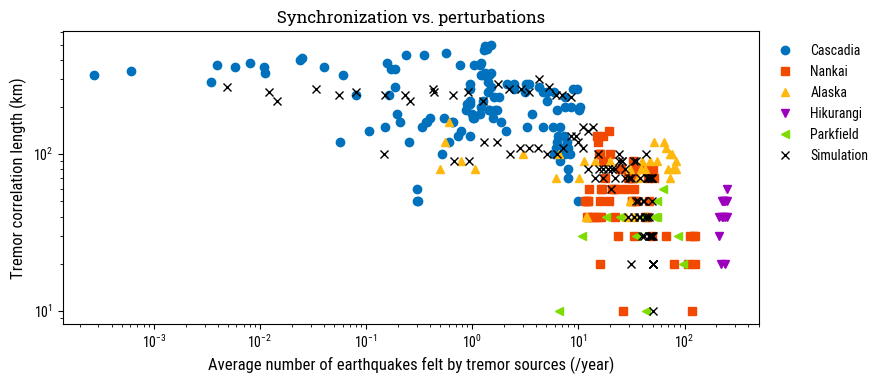

In [123]:
# Plot
fig, ax = plt.subplots(figsize=(9, 4))

ax.set_xlabel('Average number of earthquakes felt by tremor sources (/year)')
ax.set_ylabel('Tremor correlation length (km)')
ax.set_title('Synchronization vs. perturbations', fontname='Roboto Slab', fontsize=12)

ax.plot(casc_eq[dist_to_trm], casc_cc_d, 'o', label='Cascadia')
ax.plot(nank_eq[dist_to_trm], nank_cc_d, 's', label='Nankai')
ax.plot(ak_eq[dist_to_trm], ak_cc_d, '^', label='Alaska')
ax.plot(hiku_eq[dist_to_trm], hiku_cc_d, 'v', label='Hikurangi')
ax.plot(park_eq[dist_to_trm], park_cc_d, '<', label='Parkfield')
ax.plot(sim_eq, sim_cc_d, 'x', c='k', label='Simulation')
ax.set_xscale('log')
ax.set_yscale('log')
  
ax.legend(fontsize='small', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

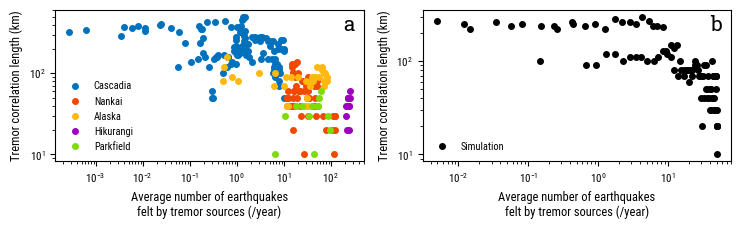

In [124]:
# Plot for paper (simple version)
with plt.style.context('grl'):
    fig, axes = plt.subplots(1, 2, figsize=np.array([19, 6]) / 2.54)
    
    # --> Data
    ax = axes[0]
    ax.set_xlabel('Average number of earthquakes\nfelt by tremor sources (/year)')
    ax.set_ylabel('Tremor correlation length (km)')

    ax.plot(casc_eq[dist_to_trm], casc_cc_d, 'o', ms=4, label='Cascadia')
    ax.plot(nank_eq[dist_to_trm], nank_cc_d, 'o', ms=4, label='Nankai')
    ax.plot(ak_eq[dist_to_trm], ak_cc_d, 'o', ms=4, label='Alaska')
    ax.plot(hiku_eq[dist_to_trm], hiku_cc_d, 'o', ms=4, label='Hikurangi')
    ax.plot(park_eq[dist_to_trm], park_cc_d, 'o', ms=4, label='Parkfield')

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend(fontsize='small', bbox_to_anchor=(0, 0), loc='lower left')

    ax.text(.97, .97, 'a', transform=ax.transAxes, fontsize=15, va='top', ha='right', fontname='Roboto Slab')

    # --> Simulation
    ax = axes[1]
    ax.set_xlabel('Average number of earthquakes\nfelt by tremor sources (/year)')
    ax.set_ylabel('Tremor correlation length (km)')

    ax.plot(sim_eq, sim_cc_d, 'o', c='k', ms=4, label='Simulation')

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend(fontsize='small', bbox_to_anchor=(0, 0), loc='lower left')

    ax.text(.97, .97, 'b', transform=ax.transAxes, fontsize=15, va='top', ha='right', fontname='Roboto Slab')

    plt.tight_layout()
    # plt.savefig('figures/synch_vs_perturbations.pdf', dpi=400)
    # plt.savefig('figures/synch_vs_perturbations.png', dpi=400)
    plt.show()

## 3.2. <a id='toc3_2_'></a>Stats    [&#128285;](#toc0_)

In [125]:
dist_to_trm = 50

In [126]:
# Compute slope, correlation coeff and significance of the linear regression (Log fit)
from scipy.stats import linregress

# --> Cascadia
no_nan = ~np.isnan(casc_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (casc_eq[dist_to_trm] > 0) & (casc_cc_d > 0)

casc_eq_log = np.log10(casc_eq[dist_to_trm][no_nan & no_0])
casc_cc_d_log = np.log10(casc_cc_d[no_nan & no_0])

slope_casc, intercept_casc, r_value_casc, p_value_casc, std_err_casc = linregress(casc_eq_log, casc_cc_d_log)

SSres = np.sum((casc_cc_d_log - (slope_casc * casc_eq_log + intercept_casc))**2)  # sum of squares of residuals
SStot = np.sum((casc_cc_d_log - np.mean(casc_cc_d_log))**2)  # total sum of squares
r2_casc = 1 - SSres / SStot

# --> Cascadia where there are earthquakes
where_eq = (casc_eq[dist_to_trm] > 1.)

casc_eq_log = np.log10(casc_eq[dist_to_trm][no_nan & no_0 & where_eq])
casc_cc_d_log = np.log10(casc_cc_d[no_nan & no_0 & where_eq])

slope_casc_eq, intercept_casc_eq, r_value_casc_eq, p_value_casc_eq, std_err_casc_eq = linregress(casc_eq_log, casc_cc_d_log)

SSres = np.sum((casc_cc_d_log - (slope_casc_eq * casc_eq_log + intercept_casc_eq))**2)  # sum of squares of residuals
SStot = np.sum((casc_cc_d_log - np.mean(casc_cc_d_log))**2)  # total sum of squares
r2_casc_eq = 1 - SSres / SStot

# --> Nankai
no_nan = ~np.isnan(nank_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (nank_eq[dist_to_trm] > 0) & (nank_cc_d > 0)

nank_eq_log = np.log10(nank_eq[dist_to_trm][no_nan & no_0])
nank_cc_d_log = np.log10(nank_cc_d[no_nan & no_0])

slope_nank, intercept_nank, r_value_nank, p_value_nank, std_err_nank = linregress(nank_eq_log, nank_cc_d_log)

SSres = np.sum((nank_cc_d_log - (slope_nank * nank_eq_log + intercept_nank))**2)  # sum of squares of residuals
SStot = np.sum((nank_cc_d_log - np.mean(nank_cc_d_log))**2)  # total sum of squares
r2_nank = 1 - SSres / SStot

# --> Alaska
no_nan = ~np.isnan(ak_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (ak_eq[dist_to_trm] > 0) & (ak_cc_d > 0)

ak_eq_log = np.log10(ak_eq[dist_to_trm][no_nan & no_0])
ak_cc_d_log = np.log10(ak_cc_d[no_nan & no_0])

slope_ak, intercept_ak, r_value_ak, p_value_ak, std_err_ak = linregress(ak_eq_log, ak_cc_d_log)

SSres = np.sum((ak_cc_d_log - (slope_ak * ak_eq_log + intercept_ak))**2)  # sum of squares of residuals
SStot = np.sum((ak_cc_d_log - np.mean(ak_cc_d_log))**2)  # total sum of squares
r2_ak = 1 - SSres / SStot

# --> Hikurangi
no_nan = ~np.isnan(hiku_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (hiku_eq[dist_to_trm] > 0) & (hiku_cc_d > 0)

hiku_eq_log = np.log10(hiku_eq[dist_to_trm][no_nan & no_0])
hiku_cc_d_log = np.log10(hiku_cc_d[no_nan & no_0])

slope_hiku, intercept_hiku, r_value_hiku, p_value_hiku, std_err_hiku = linregress(hiku_eq_log, hiku_cc_d_log)

SSres = np.sum((hiku_cc_d_log - (slope_hiku * hiku_eq_log + intercept_hiku))**2)  # sum of squares of residuals
SStot = np.sum((hiku_cc_d_log - np.mean(hiku_cc_d_log))**2)  # total sum of squares
r2_hiku = 1 - SSres / SStot

# --> Parkfield
no_nan = ~np.isnan(park_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (park_eq[dist_to_trm] > 0) & (park_cc_d > 0)

park_eq_log = np.log10(park_eq[dist_to_trm][no_nan & no_0])
park_cc_d_log = np.log10(park_cc_d[no_nan & no_0])

slope_park, intercept_park, r_value_park, p_value_park, std_err_park = linregress(park_eq_log, park_cc_d_log)

SSres = np.sum((park_cc_d_log - (slope_park * park_eq_log + intercept_park))**2)  # sum of squares of residuals
SStot = np.sum((park_cc_d_log - np.mean(park_cc_d_log))**2)  # total sum of squares
r2_park = 1 - SSres / SStot

In [127]:
# Same for simulation
# --> All points
no_nan = ~np.isnan(sim_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (sim_eq > 0) & (sim_cc_d > 0)

sim_eq_log = np.log10(sim_eq[no_nan & no_0])
sim_cc_d_log = np.log10(sim_cc_d[no_nan & no_0])

slope_sim, intercept_sim, r_value_sim, p_value_sim, std_err_sim = linregress(sim_eq_log, sim_cc_d_log)

SSres = np.sum((sim_cc_d_log - (slope_sim * sim_eq_log + intercept_sim))**2)  # sum of squares of residuals
SStot = np.sum((sim_cc_d_log - np.mean(sim_cc_d_log))**2)  # total sum of squares
r2_sim = 1 - SSres / SStot

# --> Above a few earthquakes
no_nan = ~np.isnan(sim_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (sim_eq > 1.) & (sim_cc_d > 0)

sim_eq_log = np.log10(sim_eq[no_nan & no_0])
sim_cc_d_log = np.log10(sim_cc_d[no_nan & no_0])

slope_sim_eq, intercept_sim_eq, r_value_sim_eq, p_value_sim_eq, std_err_sim_eq = linregress(sim_eq_log, sim_cc_d_log)

SSres = np.sum((sim_cc_d_log - (slope_sim_eq * sim_eq_log + intercept_sim_eq))**2)  # sum of squares of residuals
SStot = np.sum((sim_cc_d_log - np.mean(sim_cc_d_log))**2)  # total sum of squares
r2_sim_eq = 1 - SSres / SStot


/var/folders/_0/w1st1dg91_l80my3nlzkvb_w0000gn/T/ipykernel_58754/1208138373.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


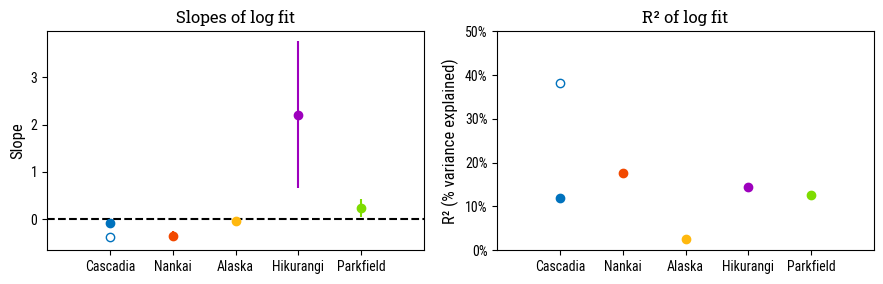

In [128]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
for a in ax:
    a.set_xlim(0, n_datasets + 1)
    a.set_xticks(np.arange(1, n_datasets + 1))
    a.set_xticklabels(['Cascadia', 'Nankai', 'Alaska', 'Hikurangi', 'Parkfield'])

ax[0].set_title('Slopes of log fit', fontname='Roboto Slab', fontsize=12)
ax[0].set_ylabel('Slope')

ax[0].axhline(0, color='black', ls='--')
ax[0].errorbar(1, slope_casc, yerr=std_err_casc, fmt='o', c='C0', label='Cascadia')
ax[0].errorbar(1, slope_casc_eq, yerr=std_err_casc_eq, fmt='o', mfc='w', mec='C0', label='Cascadia (> 1 M2.0 eq/year)')
ax[0].errorbar(2, slope_nank, yerr=std_err_nank, fmt='o', label='Nankai')
ax[0].errorbar(3, slope_ak, yerr=std_err_ak, fmt='o', label='Alaska')
ax[0].errorbar(4, slope_hiku, yerr=std_err_hiku, fmt='o', label='Hikurangi')
ax[0].errorbar(5, slope_park, yerr=std_err_park, fmt='o', label='Parkfield')
# ax[0].errorbar(5, slope_sim, yerr=std_err_sim, fmt='o', c='k', label='Simulation')
# ax[0].errorbar(5, slope_sim_eq, yerr=std_err_sim_eq, fmt='o', mfc='w', mec='k', label='Simulation')

# ax[0].text(0, 0, '+ earthquakes,\n- synchronization', fontsize=8, va='bottom', ha='left', transform=ax[0].transAxes)
# ax[0].text(0, 1, '+ earthquakes,\n+ synchronization', fontsize=8, va='top', ha='left', transform=ax[0].transAxes)

ax[1].set_title('R² of log fit', fontname='Roboto Slab', fontsize=12)
ax[1].set_ylabel('R² (% variance explained)')

ax[1].set_ylim(0, .5)
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[1].plot(1, r2_casc, 'o', c='C0', label='Cascadia')
ax[1].plot(1, r2_casc_eq, 'o', mfc='w', mec='C0', label='Cascadia (> 1 M2.0 eq/year)')
ax[1].plot(2, r2_nank, 'o', label='Nankai')
ax[1].plot(3, r2_ak, 'o', label='Alaska')
ax[1].plot(4, r2_hiku, 'o', label='Hikurangi')
ax[1].plot(5, r2_park, 'o', label='Parkfield')
# ax[1].plot(5, r2_sim, 'o', c='k', label='Simulation')
# ax[1].plot(5, r2_sim_eq, 'o', mec='k', mfc='w', label='Simulation (> 1 eq/year)')

plt.tight_layout()
plt.show()

# 4. <a id='toc4_'></a>Figures for the paper   [&#128285;](#toc0_)

## 4.1. <a id='toc4_1_'></a>Result figure  [&#128285;](#toc0_)

In [129]:
# Plot for paper (more complete version) -- Parameters
ms = 4

light_C1 = '#ffc7af'
light_C0 = '#9fd9ff'
light_C2 = '#ffeab7'
light_C3 = '#ef9fff'
light_C4 = '#daffa8'

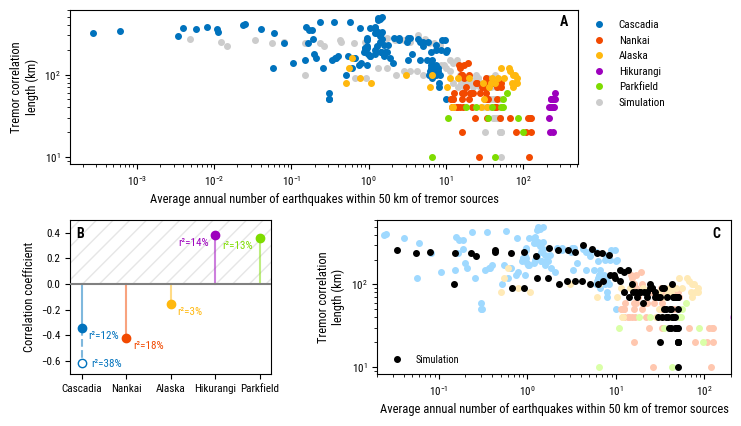

In [130]:
# Plot for paper (more complete version) -- Plot
with plt.style.context('grl'):
    fig = plt.figure(figsize=np.array([19, 11]) / 2.54)
    gs = fig.add_gridspec(2, 5)

    # --> Observations plot
    ax = fig.add_subplot(gs[0, :4])

    ax.set_xlabel('Average annual number of earthquakes within 50 km of tremor sources')
    ax.set_ylabel('Tremor correlation\nlength (km)')

    ax.plot(casc_eq[dist_to_trm], casc_cc_d, 'o', ms=ms, label='Cascadia')
    # ax.plot(casc_eq[dist_to_trm][casc_eq[dist_to_trm] >= 1.], casc_cc_d[casc_eq[dist_to_trm] >= 1.], 'o', ms=ms, mfc='w', mec='C0')
    ax.plot(nank_eq[dist_to_trm], nank_cc_d, 'o', ms=ms, label='Nankai')
    ax.plot(ak_eq[dist_to_trm], ak_cc_d, 'o', ms=ms, label='Alaska')
    ax.plot(hiku_eq[dist_to_trm], hiku_cc_d, 'o', ms=ms, label='Hikurangi')
    ax.plot(park_eq[dist_to_trm], park_cc_d, 'o', ms=ms, label='Parkfield')

    ax.plot(sim_eq, sim_cc_d, 'o', c='.8', ms=ms, label='Simulation', zorder=0)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

    ax.text(.98, .97, 'A', transform=ax.transAxes, fontsize=10, va='top', ha='right', fontweight='bold')

    # --> Stats for individual regions
    ax = fig.add_subplot(gs[1, :2])
    ax.set_xlim(.75, n_datasets + .25)
    ax.set_xticks(np.arange(1, n_datasets + 1))
    ax.set_xticklabels(['Cascadia', 'Nankai', 'Alaska', 'Hikurangi', 'Parkfield'])
    ax.set_ylabel(r'Correlation coefficient')
    ax.set_ylim(-0.7, .5)

    ax.axhline(0, color='0.5', ls='-', zorder=10)
    ax.axhspan(0, 1.5, hatch='//', zorder=0, lw=.5, fc=[0,0,0,0], edgecolor='0.9')

    ax.plot(1, r_value_casc, 'o', c='C0', label='Cascadia')
    ax.plot([1, 1], [0, r_value_casc], c=to_rgba('C0', .5), ls='-')
    ax.annotate('r²={:.0%}'.format(r_value_casc**2), (1, r_value_casc), textcoords='offset points', xytext=(5, -2), ha='left', va='top', fontsize=8, color='C0')

    ax.plot(1, r_value_casc_eq, 'o', mfc='w', mec='C0')
    ax.plot([1, 1], [r_value_casc, r_value_casc_eq], c=to_rgba('C0', .5), ls='--', zorder=0)    
    ax.annotate('r²={:.0%}'.format(r_value_casc_eq**2), (1, r_value_casc_eq), textcoords='offset points', xytext=(7, 0), ha='left', va='center', fontsize=8, color='C0')

    ax.plot(2, r_value_nank, 'o', c='C1', label='Nankai')
    ax.plot([2, 2], [0, r_value_nank], c=to_rgba('C1', .5), ls='-')
    ax.annotate('r²={:.0%}'.format(r_value_nank**2), (2, r_value_nank), textcoords='offset points', xytext=(5, -2), ha='left', va='top', fontsize=8, color='C1')

    ax.plot(3, r_value_ak, 'o', c='C2', label='Alaska')
    ax.plot([3, 3], [0, r_value_ak], c=to_rgba('C2', .5), ls='-')
    ax.annotate('r²={:.0%}'.format(r_value_ak**2), (3, r_value_ak), textcoords='offset points', xytext=(5, -2), ha='left', va='top', fontsize=8, color='C2')

    ax.plot(4, r_value_hiku, 'o', c='C3', label='Hikurangi')
    ax.plot([4, 4], [0, r_value_hiku], c=to_rgba('C3', .5), ls='-')
    ax.annotate('r²={:.0%}'.format(r_value_hiku**2), (4, r_value_hiku), textcoords='offset points', xytext=(-5, -2), ha='right', va='top', fontsize=8, color='C3')

    ax.plot(5, r_value_park, 'o', c='C4', label='Parkfield')
    ax.plot([5, 5], [0, r_value_park], c=to_rgba('C4', .5), ls='-')
    ax.annotate('r²={:.0%}'.format(r_value_park**2), (5, r_value_park), textcoords='offset points', xytext=(-5, -2), ha='right', va='top', fontsize=8, color='C4')

    ax.text(.03, .95, 'B', transform=ax.transAxes, fontsize=10, va='top', ha='left', fontweight='bold')

    # --> Simulation plot
    ax = fig.add_subplot(gs[1, 2:])

    ax.set_xlabel('Average annual number of earthquakes within 50 km of tremor sources')
    ax.set_ylabel('Tremor correlation\nlength (km)')
    ax.set_xlim(0.02, 200)

    ax.plot(sim_eq, sim_cc_d, 'o', c='k', ms=ms, label='Simulation')

    ax.legend(fontsize='small', bbox_to_anchor=(0, 0), loc='lower left')

    ax.plot(casc_eq[dist_to_trm], casc_cc_d, 'o', ms=ms, c=light_C0, zorder=0)
    ax.plot(nank_eq[dist_to_trm], nank_cc_d, 'o', ms=ms, c=light_C1, zorder=0)
    ax.plot(ak_eq[dist_to_trm], ak_cc_d, 'o', ms=ms, c=light_C2, zorder=0)
    ax.plot(hiku_eq[dist_to_trm], hiku_cc_d, 'o', ms=ms, c=light_C3, zorder=0)
    ax.plot(park_eq[dist_to_trm], park_cc_d, 'o', ms=ms, c=light_C4, zorder=0)
    
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.text(.97, .95, 'C', transform=ax.transAxes, fontsize=10, va='top', ha='right', fontweight='bold')

    plt.tight_layout()
    plt.savefig('figures/synch_vs_perturbations_large.pdf', dpi=400)
    plt.savefig('figures/synch_vs_perturbations_large.png', dpi=400)
    plt.show()

## 4.2. <a id='toc4_2_'></a>Robustness figure (distance)  [&#128285;](#toc0_)

In [131]:
dists = [10, 20, 30, 50, 100]

In [132]:
# Compute slope, correlation coeff and significance of the linear regression (Log fit)

slope_casc, intercept_casc, r_value_casc, p_value_casc, std_err_casc, r2_casc = {}, {}, {}, {}, {}, {}
slope_nank, intercept_nank, r_value_nank, p_value_nank, std_err_nank, r2_nank = {}, {}, {}, {}, {}, {}
slope_ak, intercept_ak, r_value_ak, p_value_ak, std_err_ak, r2_ak = {}, {}, {}, {}, {}, {}
slope_hiku, intercept_hiku, r_value_hiku, p_value_hiku, std_err_hiku, r2_hiku = {}, {}, {}, {}, {}, {}
slope_park, intercept_park, r_value_park, p_value_park, std_err_park, r2_park = {}, {}, {}, {}, {}, {}

for d in dists:
    # --> Cascadia
    no_nan = ~np.isnan(casc_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
    no_0 = (casc_eq[d] > 0) & (casc_cc_d > 0)

    casc_eq_log = np.log10(casc_eq[d][no_nan & no_0])
    casc_cc_d_log = np.log10(casc_cc_d[no_nan & no_0])

    slope_casc[d], intercept_casc[d], r_value_casc[d], p_value_casc[d], std_err_casc[d] = linregress(casc_eq_log, casc_cc_d_log)

    r2_casc[d] = r_value_casc[d]**2

    # --> Nankai
    no_nan = ~np.isnan(nank_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
    no_0 = (nank_eq[d] > 0) & (nank_cc_d > 0)

    nank_eq_log = np.log10(nank_eq[d][no_nan & no_0])
    nank_cc_d_log = np.log10(nank_cc_d[no_nan & no_0])

    slope_nank[d], intercept_nank[d], r_value_nank[d], p_value_nank[d], std_err_nank[d] = linregress(nank_eq_log, nank_cc_d_log)

    r2_nank[d] = r_value_nank[d]**2

    # --> Alaska
    no_nan = ~np.isnan(ak_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
    no_0 = (ak_eq[d] > 0) & (ak_cc_d > 0)

    ak_eq_log = np.log10(ak_eq[d][no_nan & no_0])
    ak_cc_d_log = np.log10(ak_cc_d[no_nan & no_0])

    slope_ak[d], intercept_ak[d], r_value_ak[d], p_value_ak[d], std_err_ak[d] = linregress(ak_eq_log, ak_cc_d_log)

    r2_ak[d] = r_value_ak[d]**2

    # --> Hikurangi
    no_nan = ~np.isnan(hiku_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
    no_0 = (hiku_eq[d] > 0) & (hiku_cc_d > 0)

    hiku_eq_log = np.log10(hiku_eq[d][no_nan & no_0])
    hiku_cc_d_log = np.log10(hiku_cc_d[no_nan & no_0])
    try:
        slope_hiku[d], intercept_hiku[d], r_value_hiku[d], p_value_hiku[d], std_err_hiku[d] = linregress(hiku_eq_log, hiku_cc_d_log)

        r2_hiku[d] = r_value_hiku[d]**2
    except:
        slope_hiku[d], intercept_hiku[d], r_value_hiku[d], p_value_hiku[d], std_err_hiku[d] = np.nan, np.nan, np.nan, np.nan, np.nan
        r2_hiku[d] = np.nan

    # --> Parkfield
    no_nan = ~np.isnan(park_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
    no_0 = (park_eq[d] > 0) & (park_cc_d > 0)

    park_eq_log = np.log10(park_eq[d][no_nan & no_0])
    park_cc_d_log = np.log10(park_cc_d[no_nan & no_0])

    slope_park[d], intercept_park[d], r_value_park[d], p_value_park[d], std_err_park[d] = linregress(park_eq_log, park_cc_d_log)

    r2_park[d] = r_value_park[d]**2

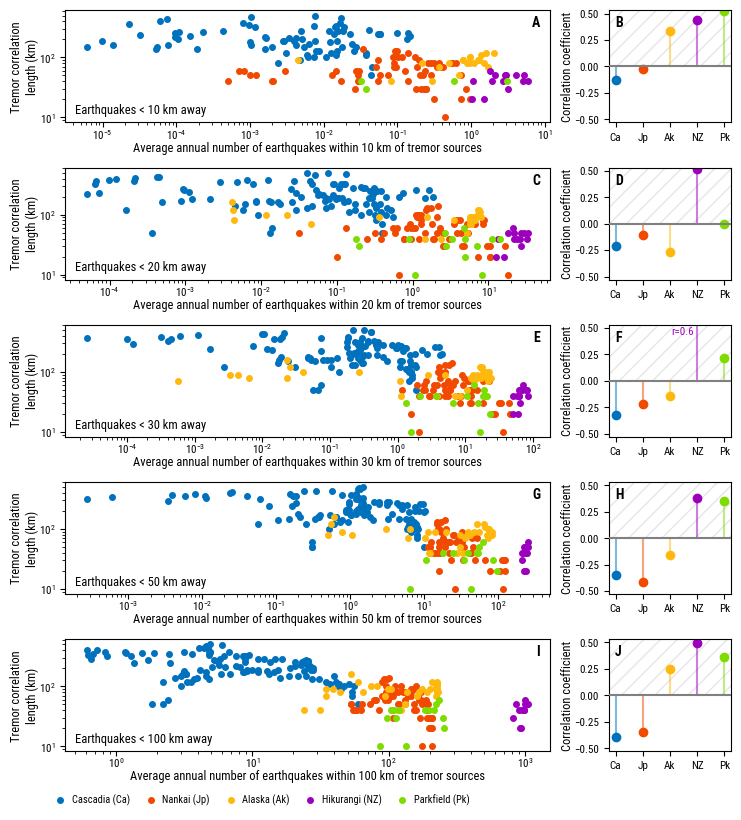

In [135]:
with plt.style.context('grl'):
    fig = plt.figure(figsize=np.array([19, 21])/2.54)
    gs = fig.add_gridspec(5, 4)

    letters = np.array([['A', 'B'], ['C', 'D'], ['E', 'F'], ['G', 'H'], ['I', 'J']])

    for ii, d in enumerate(dists):
        # Results
        ax = fig.add_subplot(gs[ii, :3])
        ax.set_xlabel('Average annual number of earthquakes within {:d} km of tremor sources'.format(d), labelpad=0)
        ax.tick_params(axis='x', pad=0)

        ax.set_ylabel('Tremor correlation\nlength (km)', labelpad=0)

        ax.plot(casc_eq[d], casc_cc_d, 'o', ms=ms, label='Cascadia (Ca)')
        ax.plot(nank_eq[d], nank_cc_d, 'o', ms=ms, label='Nankai (Jp)')
        ax.plot(ak_eq[d], ak_cc_d, 'o', ms=ms, label='Alaska (Ak)')
        ax.plot(hiku_eq[d], hiku_cc_d, 'o', ms=ms, label='Hikurangi (NZ)')
        ax.plot(park_eq[d], park_cc_d, 'o', ms=ms, label='Parkfield (Pk)')

        ax.set_xscale('log')
        ax.set_yscale('log')

        if ii == 4:
            ax.legend(fontsize='small', ncols=5, bbox_to_anchor=(-.05, -.3), loc='upper left', columnspacing=1, handletextpad=0.1)

        ax.text(0.98, 0.95, letters[ii, 0], fontweight='bold', fontsize=10, transform=ax.transAxes, va='top', ha='right')
        ax.text(0.02, 0.05, 'Earthquakes < {:d} km away'.format(d), transform=ax.transAxes, va='bottom', ha='left')

        # Stats
        ax = fig.add_subplot(gs[ii, 3:])
        ax.set_xlim(.75, n_datasets + .25)
        ax.set_xticks(np.arange(1, n_datasets + 1))
        ax.set_xticklabels(['Ca', 'Jp', 'Ak', 'NZ', 'Pk'])
        ax.set_ylabel('Correlation coefficient', labelpad=0)

        ax.axhline(0, color='0.5', ls='-', zorder=10)
        ax.axhspan(0, 1.5, hatch='//', zorder=0, lw=.5, fc=[0,0,0,0], edgecolor='0.9')

        ax.set_ylim(-0.53, .53)

        ax.plot(1, r_value_casc[d], 'o', c='C0', label='Cascadia')
        ax.plot([1, 1], [0, r_value_casc[d]], c=to_rgba('C0', .5), ls='-')
        ax.plot(2, r_value_nank[d], 'o', c='C1', label='Nankai')
        ax.plot([2, 2], [0, r_value_nank[d]], c=to_rgba('C1', .5), ls='-')
        ax.plot(3, r_value_ak[d], 'o', c='C2', label='Alaska')
        ax.plot([3, 3], [0, r_value_ak[d]], c=to_rgba('C2', .5), ls='-')
        ax.plot(4, r_value_hiku[d], 'o', c='C3', label='Hikurangi')
        ax.plot([4, 4], [0, r_value_hiku[d]], c=to_rgba('C3', .5), ls='-')
        ax.plot(5, r_value_park[d], 'o', c='C4', label='Parkfield')
        ax.plot([5, 5], [0, r_value_park[d]], c=to_rgba('C4', .5), ls='-')
        
        if r_value_hiku[d] > .53:
            ax.text(3.9, .51, 'r={:.1f}'.format(r_value_hiku[d]), fontsize=8, va='top', ha='right', c='C3') 

        ax.text(0.05, 0.95, letters[ii, 1], fontweight='bold', fontsize=10, transform=ax.transAxes, va='top', ha='left')

    plt.tight_layout()
    plt.savefig('figures/robustness.pdf', dpi=400)
    plt.savefig('figures/robustness.png', dpi=400)
    plt.show()

## 4.3. <a id='toc4_3_'></a>Robustness figure (thresholds and binning) [&#128285;](#toc0_)

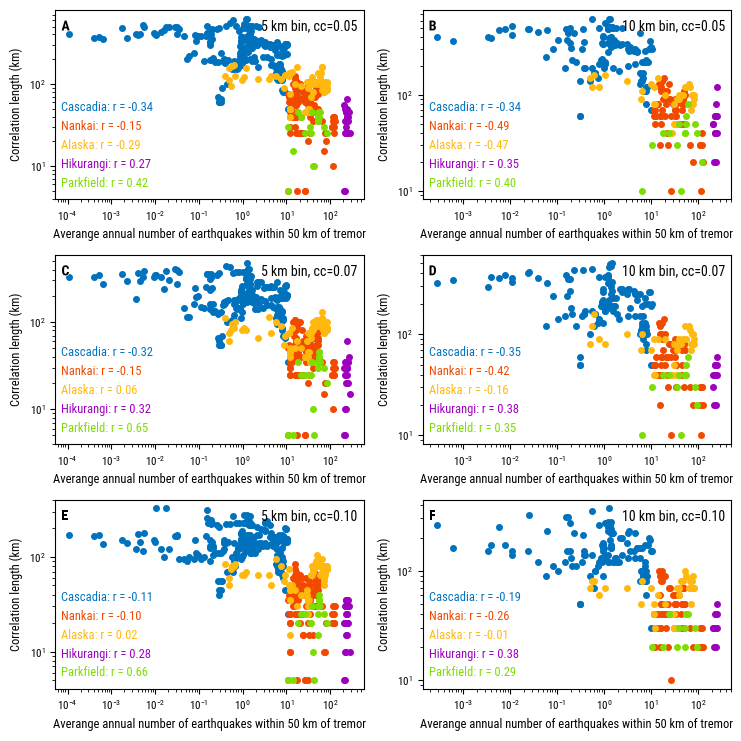

In [154]:
with plt.style.context('grl'):
    fig = plt.figure(figsize=np.array([19, 19])/2.54)
    gs = fig.add_gridspec(3, 2)
    
    ccs = [0.05, 0.07, 0.1]
    dxs = [5, 10]
    letters = np.array([['A', 'B'], ['C', 'D'], ['E', 'F']])

    for cc in ccs:
        for dx in dxs:
            ax = fig.add_subplot(gs[ccs.index(cc), dxs.index(dx)])
            ax.set_ylabel('Correlation length (km)')
            ax.set_xlabel('Averange annual number of earthquakes within 50 km of tremor')
            ax.set_xscale('log')
            ax.set_yscale('log')

            parkfield = full_results['dx{:d}_cc{:.2f}'.format(dx, cc)]['parkfield']
            park_eq = parkfield['n_close_eq'][50]
            park_cc_d = parkfield['corr_length']

            cascadia = full_results['dx{:d}_cc{:.2f}'.format(dx, cc)]['cascadia']
            casc_eq = cascadia['n_close_eq'][50]
            casc_cc_d = cascadia['corr_length']

            nankai = full_results['dx{:d}_cc{:.2f}'.format(dx, cc)]['nankai']
            nank_eq = nankai['n_close_eq'][50]
            nank_cc_d = nankai['corr_length']

            alaska = full_results['dx{:d}_cc{:.2f}'.format(dx, cc)]['alaska']
            ak_eq = alaska['n_close_eq'][50]
            ak_cc_d = alaska['corr_length']

            hikurangi = full_results['dx{:d}_cc{:.2f}'.format(dx, cc)]['hikurangi']
            hiku_eq = hikurangi['n_close_eq'][50]
            hiku_cc_d = hikurangi['corr_length']

            ax.plot(casc_eq, casc_cc_d, 'o', ms=4, label='Cascadia')
            ax.plot(nank_eq, nank_cc_d, 'o', ms=4, label='Nankai')
            ax.plot(ak_eq, ak_cc_d, 'o', ms=4, label='Alaska')
            ax.plot(hiku_eq, hiku_cc_d, 'o', ms=4, label='Hikurangi')
            ax.plot(park_eq, park_cc_d, 'o', ms=4, label='Parkfield')
            
            ax.text(.98, .95, '{:d} km bin, cc={:.2f}'.format(dx, cc), transform=ax.transAxes, fontsize=10, va='top', ha='right')
            ax.text(.02, .95, letters[ccs.index(cc), dxs.index(dx)], transform=ax.transAxes, fontsize=10, fontweight='bold', va='top', ha='left', path_effects=[path_effects.Stroke(linewidth=1, foreground='white'), path_effects.Normal()])

            r_casc = np.corrcoef(np.log10(casc_eq[~np.isnan(casc_cc_d) & (casc_eq > 0) & (casc_cc_d > 0)]), np.log10(casc_cc_d[~np.isnan(casc_cc_d) & (casc_eq > 0) & (casc_cc_d > 0)]))[0, 1]
            r_nank = np.corrcoef(np.log10(nank_eq[~np.isnan(nank_cc_d) & (nank_eq > 0) & (nank_cc_d > 0)]), np.log10(nank_cc_d[~np.isnan(nank_cc_d) & (nank_eq > 0) & (nank_cc_d > 0)]))[0, 1]
            r_ak = np.corrcoef(np.log10(ak_eq[~np.isnan(ak_cc_d) & (ak_eq > 0) & (ak_cc_d > 0)]), np.log10(ak_cc_d[~np.isnan(ak_cc_d) & (ak_eq > 0) & (ak_cc_d > 0)]))[0, 1]
            r_hiku = np.corrcoef(np.log10(hiku_eq[~np.isnan(hiku_cc_d) & (hiku_eq > 0) & (hiku_cc_d > 0)]), np.log10(hiku_cc_d[~np.isnan(hiku_cc_d) & (hiku_eq > 0) & (hiku_cc_d > 0)]))[0, 1]
            r_park = np.corrcoef(np.log10(park_eq[~np.isnan(park_cc_d) & (park_eq > 0) & (park_cc_d > 0)]), np.log10(park_cc_d[~np.isnan(park_cc_d) & (park_eq > 0) & (park_cc_d > 0)]))[0, 1]

            ax.text(.02, .45, 'Cascadia: r = {:.2f}'.format(r_casc), transform=ax.transAxes, fontsize=9, va='bottom', ha='left', color='C0')
            ax.text(.02, .35, 'Nankai: r = {:.2f}'.format(r_nank), transform=ax.transAxes, fontsize=9, va='bottom', ha='left', color='C1')
            ax.text(.02, .25, 'Alaska: r = {:.2f}'.format(r_ak), transform=ax.transAxes, fontsize=9, va='bottom', ha='left', color='C2')
            ax.text(.02, .15, 'Hikurangi: r = {:.2f}'.format(r_hiku), transform=ax.transAxes, fontsize=9, va='bottom', ha='left', color='C3')
            ax.text(.02, .05, 'Parkfield: r = {:.2f}'.format(r_park), transform=ax.transAxes, fontsize=9, va='bottom', ha='left', color='C4')

    plt.tight_layout()
    plt.savefig('figures/robustness_cc_dx.pdf', dpi=400)
    plt.savefig('figures/robustness_cc_dx.png', dpi=400)
    plt.show()